<a href="https://colab.research.google.com/github/davidofitaly/05_decision_tree_regression_projects/blob/main/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of contents:
1. [Import of libraries](#0)
2. [Data generation](#1)
3. [Linear Regression](#2)
4. [Linear model of the four degree](#3)
5. [Regression of decision trees](#4)
6. [Grid Search](#5)
7. [](#6)
8. [](#7)


### <a name='0'></a> Import of libraries

In [2]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

np.set_printoptions(precision=4, suppress=True)

# Set the font scale for Seaborn plots
sns.set(font_scale=1.3)


# Print the version of the imported libraries for refernece
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')
print(f'Sklearn: {sklearn.__version__}')
print(f'Seaborn: {sns.__version__}')

Pandas: 2.1.4
Numpy: 1.26.4
Sklearn: 1.5.2
Seaborn: 0.13.1


### <a name='1'></a> Data generation

In [3]:
# Import function to generate synthetic regression datasets
from sklearn.datasets import make_regression

# Generate synthetic data for regression
data, target = make_regression(n_samples=400, n_features=1, noise=20)

# Cube the target values to introduce non-linearity
target = target ** 2

print(f"{data[:5]}")
print(f"{target[:5]}")

[[-1.1345]
 [-0.1688]
 [-0.4102]
 [ 0.2905]
 [ 0.9219]]
[8180.1663  390.346   656.4456  176.8411 7778.4032]


### <a name='2'></a> Linear Regression

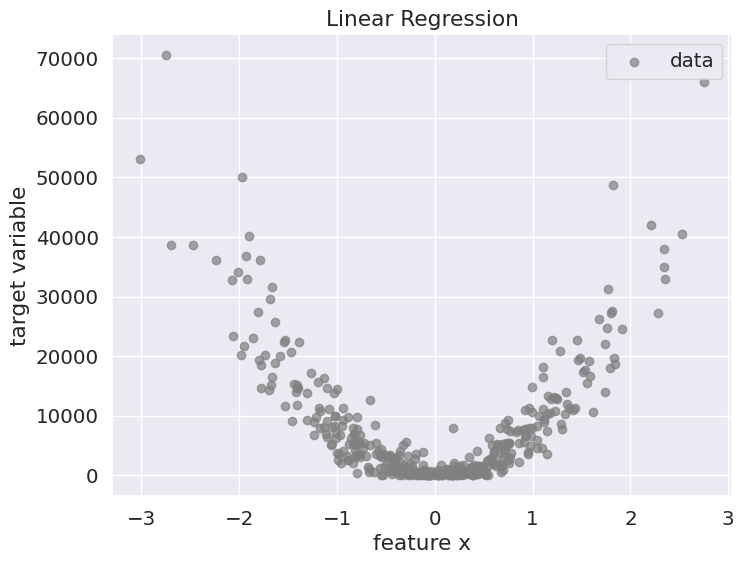

In [4]:
# Create and display scatter plot for generated data
plt.figure(figsize=(8,6))
plt.title('Linear Regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(data, target, label='data', color='grey', alpha=0.7)
plt.legend()

In [5]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 20% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (320, 1)
X_test shape: (80, 1)
y_train shape: (320,)
y_test shape: (80,)


In [6]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

intercept_linear = regressor_linear.intercept_
coef_linear = regressor_linear.coef_[0]

print(regressor_linear.score(X_test, y_test))

0.009609102507661116


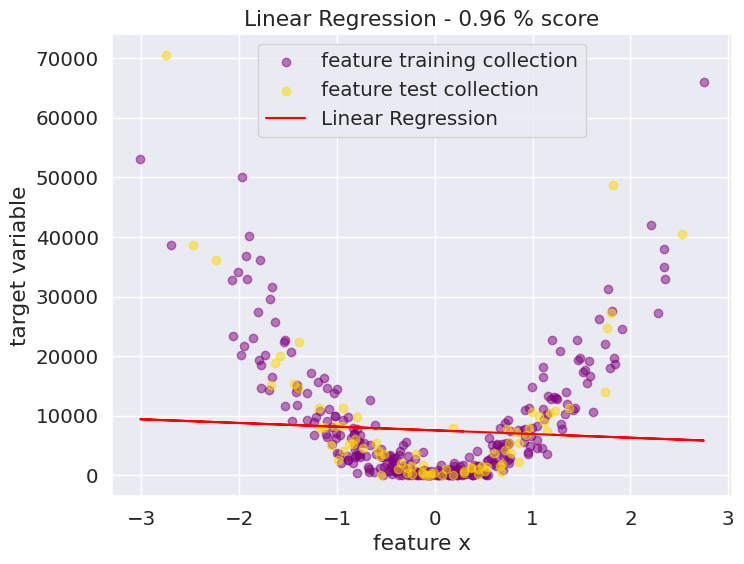

In [7]:
# Plot training and test datasets with a polynomial regression line of degree 1
plt.figure(figsize=(8,6))
plt.title(f'Linear Regression - {regressor_linear.score(X_test, y_test)* 100:.2f} % score')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='feature training collection', color='purple', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_train, intercept_linear + coef_linear * X_train, color='red', label='Linear Regression')
plt.plot()
plt.legend()


###  <a name='3'></a> Linear model of the four degree

In [8]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 20% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (320, 1)
X_test shape: (80, 1)
y_train shape: (320,)
y_test shape: (80,)


In [9]:
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of the LinearRegression class
poly = PolynomialFeatures(degree=4)


X_train_poly_4 = poly.fit_transform(X_train)
X_test_poly_4 = poly.transform(X_test)

In [10]:
X_train_poly_4[:10]

array([[ 1.    ,  0.2905,  0.0844,  0.0245,  0.0071],
       [ 1.    , -0.1257,  0.0158, -0.002 ,  0.0002],
       [ 1.    ,  1.2213,  1.4916,  1.8218,  2.225 ],
       [ 1.    ,  0.9018,  0.8133,  0.7335,  0.6615],
       [ 1.    , -1.1065,  1.2244, -1.3548,  1.4992],
       [ 1.    , -1.4757,  2.1777, -3.2136,  4.7423],
       [ 1.    ,  0.6894,  0.4753,  0.3277,  0.2259],
       [ 1.    ,  0.7578,  0.5742,  0.4352,  0.3298],
       [ 1.    , -0.3625,  0.1314, -0.0476,  0.0173],
       [ 1.    , -0.2361,  0.0557, -0.0132,  0.0031]])

In [11]:
X_test_poly_4[:10]

array([[ 1.    , -1.6351,  2.6735, -4.3715,  7.1477],
       [ 1.    ,  1.7353,  3.0114,  5.2258,  9.0686],
       [ 1.    ,  2.5291,  6.3961, 16.1761, 40.9101],
       [ 1.    , -0.3796,  0.1441, -0.0547,  0.0208],
       [ 1.    , -0.234 ,  0.0547, -0.0128,  0.003 ],
       [ 1.    , -0.9501,  0.9028, -0.8577,  0.815 ],
       [ 1.    ,  0.7607,  0.5787,  0.4403,  0.3349],
       [ 1.    ,  0.3725,  0.1387,  0.0517,  0.0193],
       [ 1.    ,  0.9619,  0.9252,  0.8899,  0.856 ],
       [ 1.    ,  1.1435,  1.3075,  1.4951,  1.7097]])

In [12]:
regressor_4 = LinearRegression()
regressor_4.fit(X_train_poly_4, y_train)

print(regressor_4.score(X_test_poly_4, y_test))

0.8641067116323592


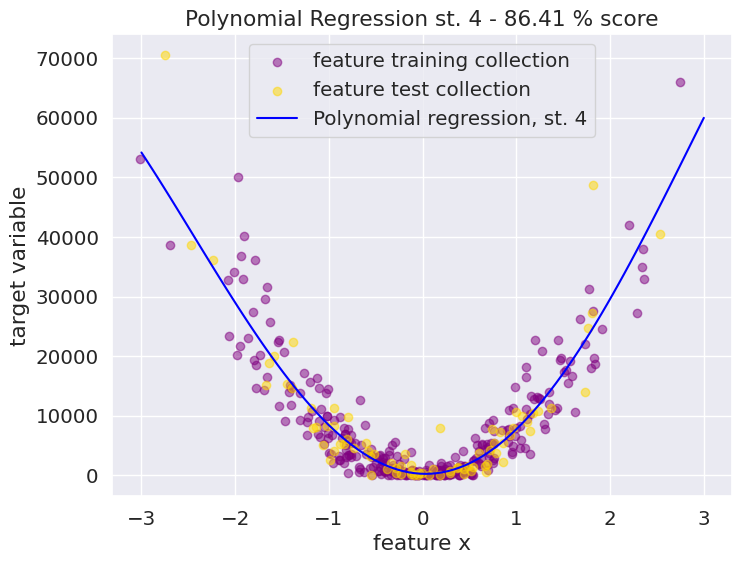

In [13]:
X_range_4 = np.linspace(-3, 3, 100).reshape(-1, 1) # Generate 100 evenly spaced values between -10 and 10 for plotting
X_range_poly_4 = poly.transform(X_range_4) # Transform the generated values into polynomial features
y_range_pred_4 = regressor_4.predict(X_range_poly_4) # Predict the target values using the trained polynomial regression model


# Plot training and test datasets with a polynomial regression line of degree 4
plt.figure(figsize=(8,6))
plt.title(f'Polynomial Regression st. 4 - {regressor_4.score(X_test_poly_4, y_test)* 100:.2f} % score')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='feature training collection', color='purple', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_range_4, y_range_pred_4, color='blue', label='Polynomial regression, st. 4')
plt.plot()
plt.legend()

### <a name='4'></a> Regression of decision trees

In [23]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 20% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (320, 1)
X_test shape: (80, 1)
y_train shape: (320,)
y_test shape: (80,)


In [24]:
# Import the DecisionTreeRegressor class from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Create a instance and Fit model on the training data
regressor_tree = DecisionTreeRegressor()
regressor_tree.fit(X_train, y_train)



DecisionTreeRegressor()

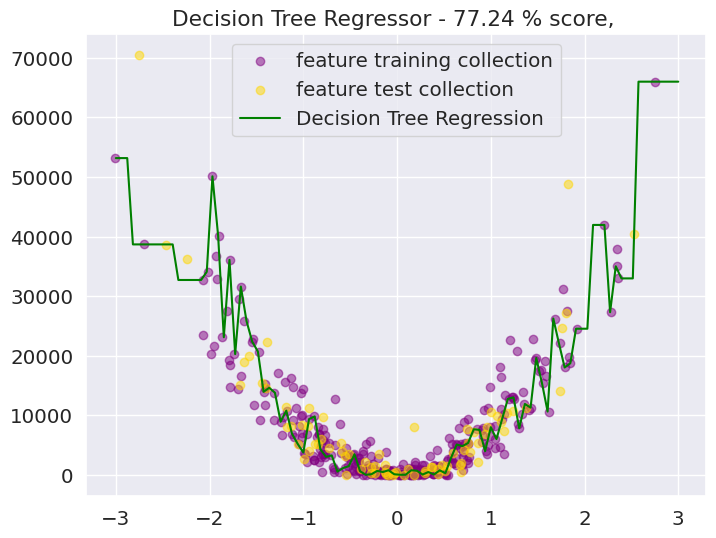

In [25]:
X_grid = np.linspace(-3, 3, 100).reshape(-1, 1) # Generate 100 evenly spaced values between -10 and 10 for plotting
y_pred_grid = regressor_tree.predict(X_grid) # Predict the target values using the trained polynomial regression model


plt.figure(figsize=(8,6))
plt.title(f'Decision Tree Regressor - {regressor_tree.score(X_test, y_test)* 100:.2f} % score, ')
plt.scatter(X_train, y_train, label='feature training collection', color='purple', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_grid, y_pred_grid, color='green', label='Decision Tree Regression')
plt.legend()
plt.show()

- max_depth=1

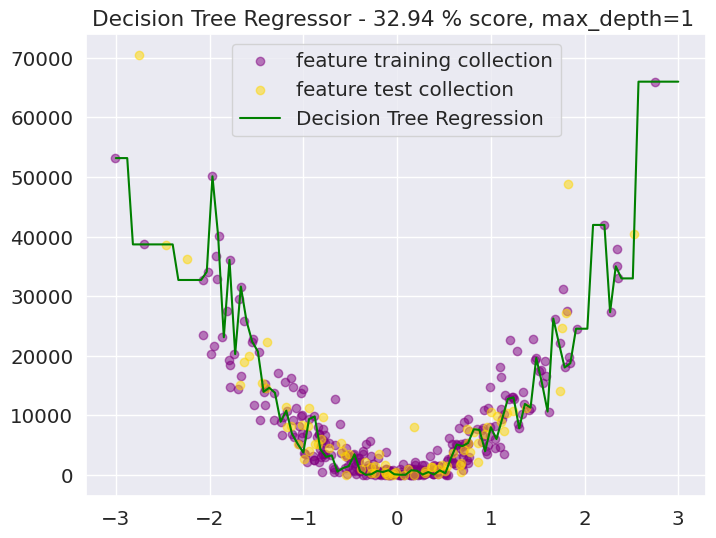

In [26]:
max_depth = 1

regressor_tree = DecisionTreeRegressor(max_depth = max_depth)
regressor_tree.fit(X_train, y_train)
y_pred_grid = regressor_tree.predict(X_grid)

plt.figure(figsize=(8,6))
plt.title(f'Decision Tree Regressor - {regressor_tree.score(X_test, y_test)* 100:.2f} % score, max_depth={max_depth} ')
plt.scatter(X_train, y_train, label='feature training collection', color='purple', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_grid, y_pred_grid, color='green', label='Decision Tree Regression')
plt.legend()
plt.show()

- max_depth=2

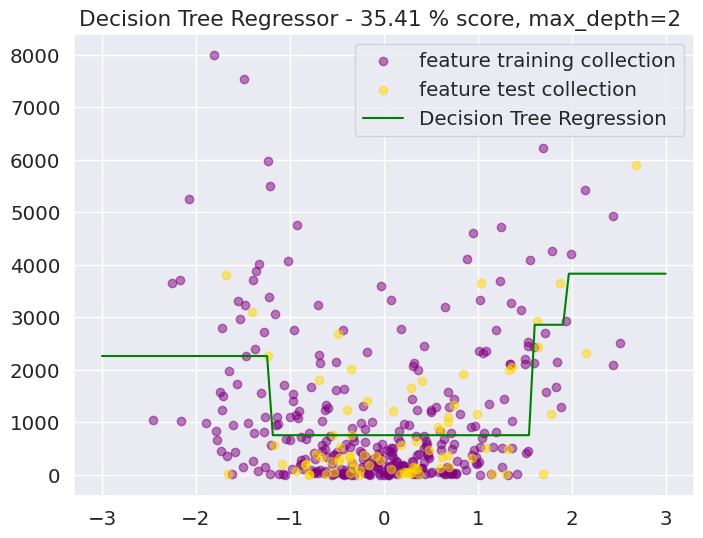

In [17]:
max_depth = 2

regressor_tree = DecisionTreeRegressor(max_depth = max_depth)
regressor_tree.fit(X_train, y_train)
y_pred_grid = regressor_tree.predict(X_grid)

plt.figure(figsize=(8,6))
plt.title(f'Decision Tree Regressor - {regressor_tree.score(X_test, y_test)* 100:.2f} % score, max_depth={max_depth} ')
plt.scatter(X_train, y_train, label='feature training collection', color='purple', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_grid, y_pred_grid, color='green', label='Decision Tree Regression')
plt.legend()
plt.show()

- max_depth=3

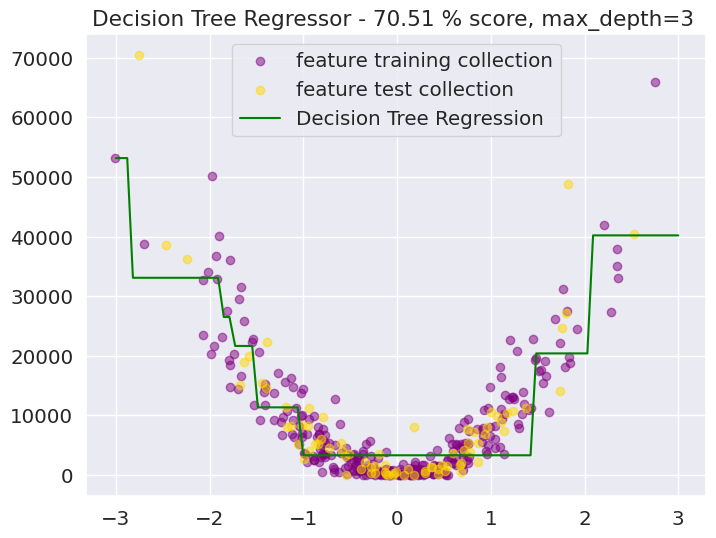

In [27]:
max_depth = 3

regressor_tree = DecisionTreeRegressor(max_depth = max_depth)
regressor_tree.fit(X_train, y_train)
y_pred_grid = regressor_tree.predict(X_grid)

plt.figure(figsize=(8,6))
plt.title(f'Decision Tree Regressor - {regressor_tree.score(X_test, y_test)* 100:.2f} % score, max_depth={max_depth} ')
plt.scatter(X_train, y_train, label='feature training collection', color='purple', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_grid, y_pred_grid, color='green', label='Decision Tree Regression')
plt.legend()
plt.show()

#### Regression of decision trees + Decision tree graph - automotion

In [19]:
from sklearn.tree import export_graphviz
import six
from io import StringIO
from IPython.display import Image
import pydotplus

def make_dt_regression(max_depth=1):
    regressor_tree = DecisionTreeRegressor(max_depth=max_depth)
    regressor_tree.fit(X_train, y_train)
    y_pred_grid = regressor_tree.predict(X_grid)

    plt.figure(figsize=(8,6))
    plt.title(f'Decision Tree Regressor - {regressor_tree.score(X_test, y_test)* 100:.2f} % score, max_depth={max_depth} ')
    plt.scatter(X_train, y_train, label='feature training collection', color='purple', alpha=0.5)
    plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
    plt.plot(X_grid, y_pred_grid, color='green', label='Decision Tree Regression')

    dot_data = StringIO()
    export_graphviz(regressor_tree, out_file=dot_data,
                   filled=True, rounded=True,
                   special_characters=True,
                   feature_names=['cecha x'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    return Image(graph.create_png(), width=500 + max_depth * 200)


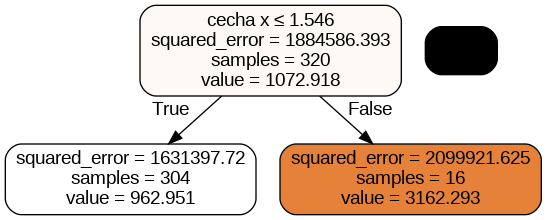

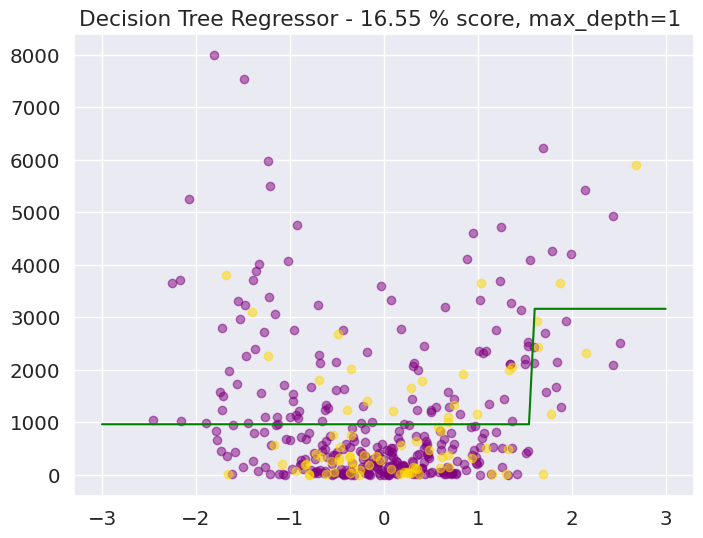

In [20]:
make_dt_regression(max_depth=1)

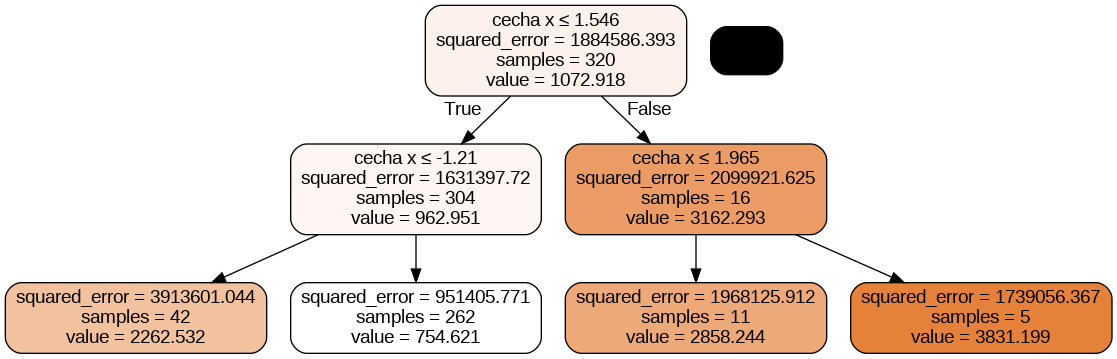

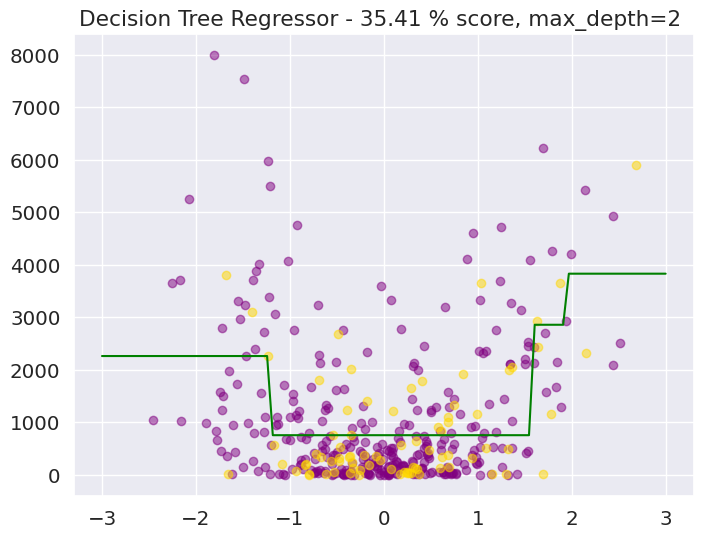

In [21]:
make_dt_regression(max_depth=2)

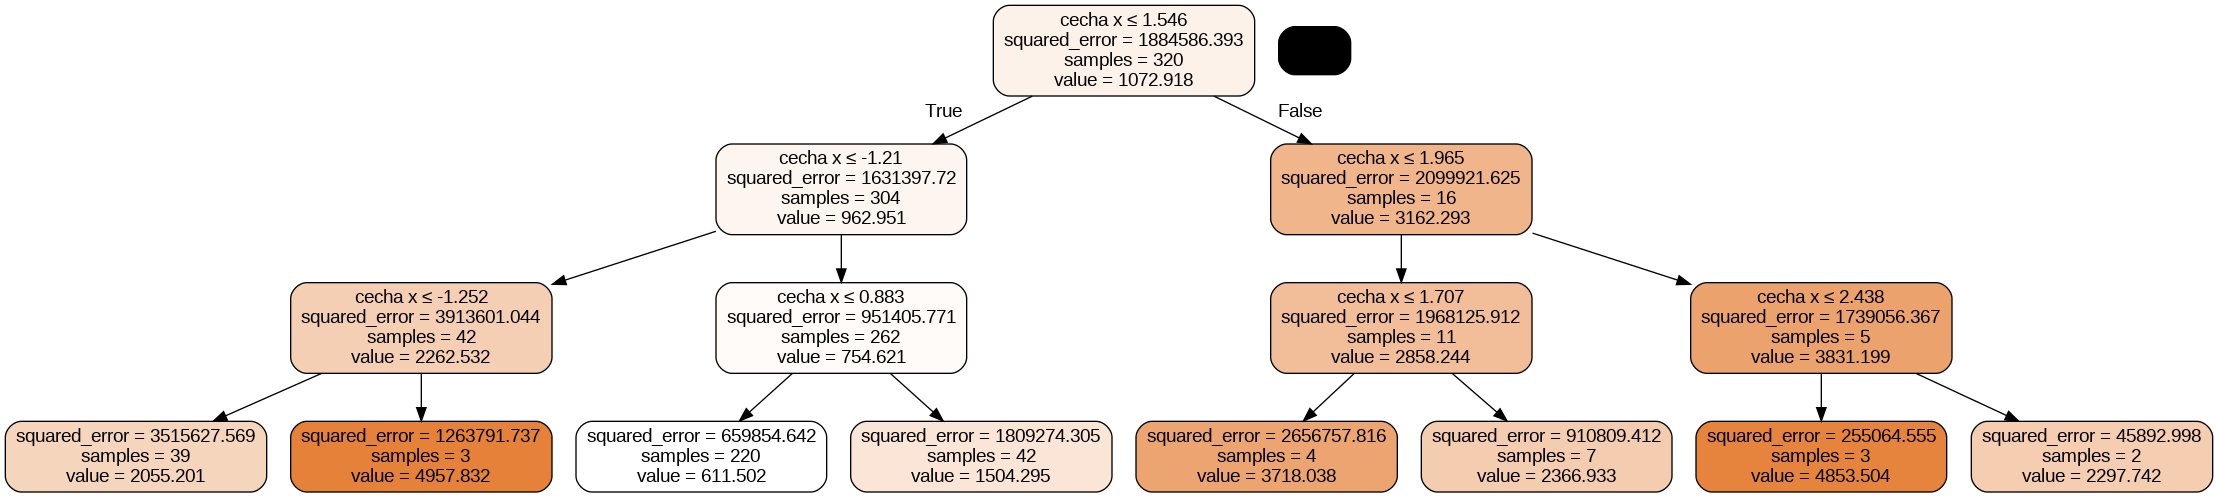

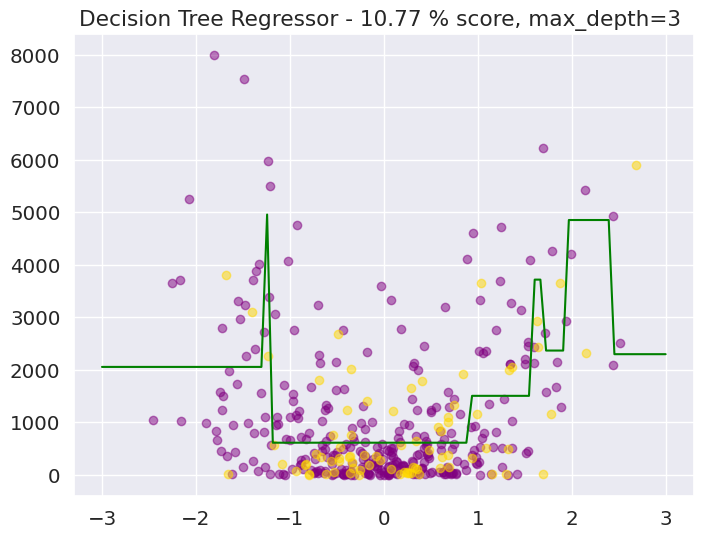

In [22]:
make_dt_regression(max_depth=3)

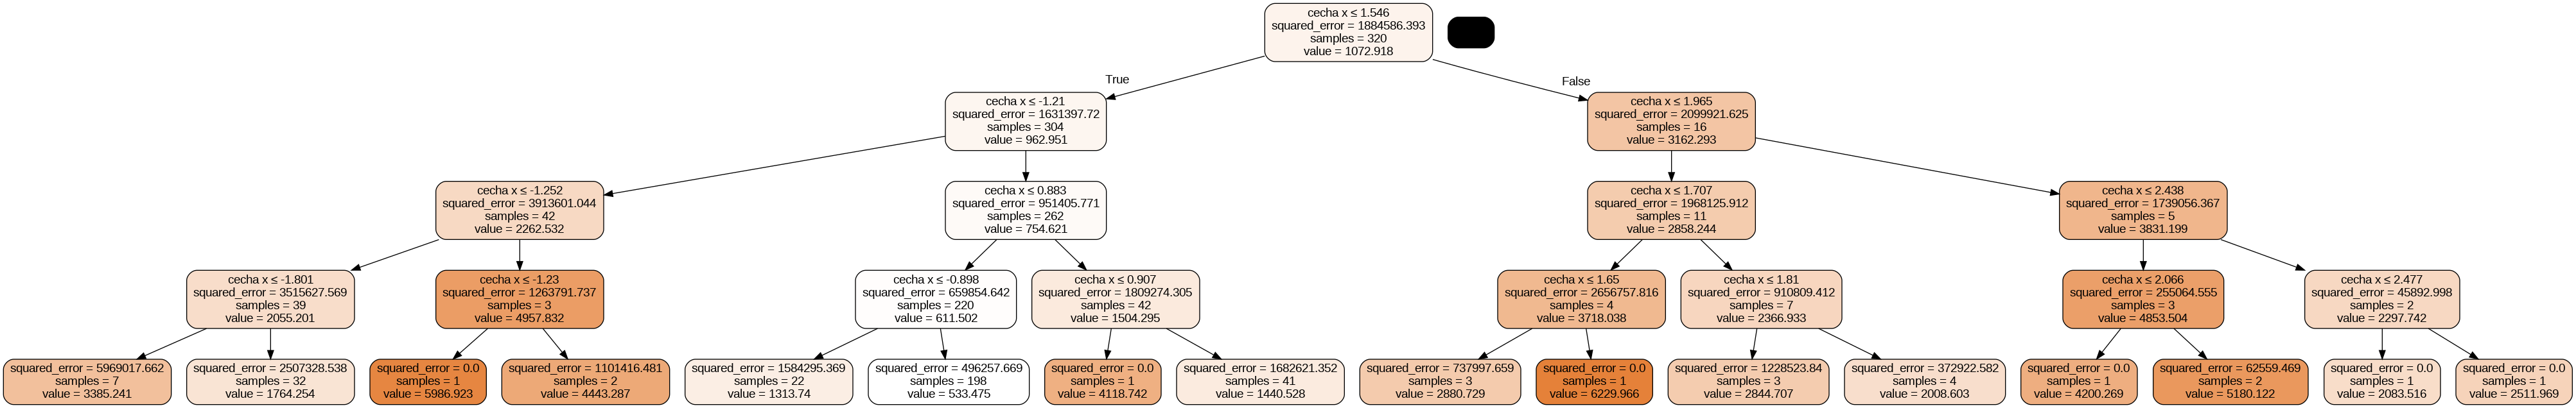

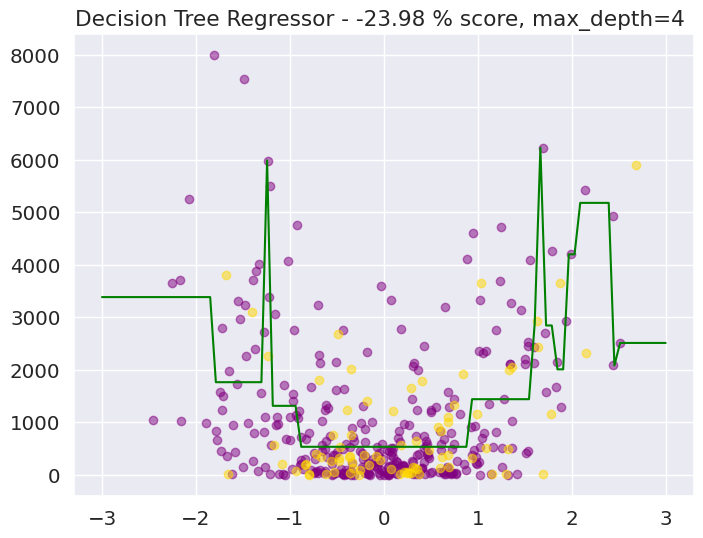

In [23]:
make_dt_regression(max_depth=4)

### <a name='5'></a> Grid Search

In [24]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split, GridSearchCV

# Split datasets into training and testing sets with 20% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (320, 1)
X_test shape: (80, 1)
y_train shape: (320,)
y_test shape: (80,)


In [25]:
param_grid = {
    'max_depth': [None, 1,2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2,5,10,15],
    'min_samples_leaf': [1,2,3,4,5],

}


params = DecisionTreeRegressor()


grid_search = GridSearchCV(estimator=params, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=1)


grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}


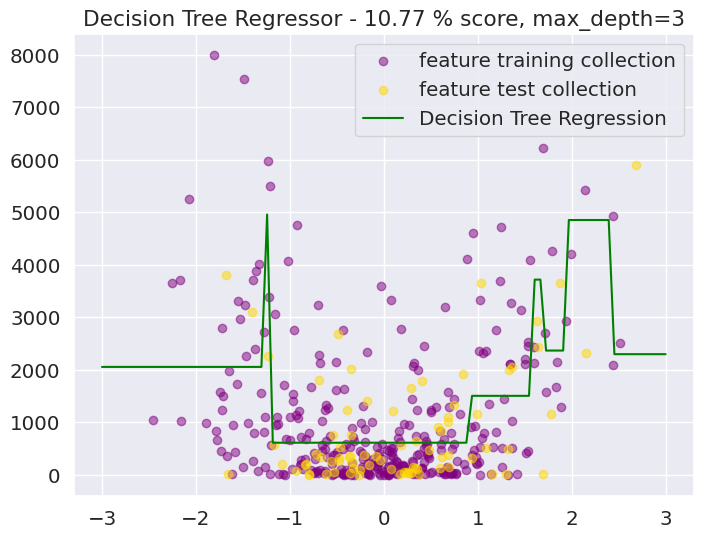

In [26]:
best_params = grid_search.best_params_


regressor_tree = DecisionTreeRegressor(**best_params)
regressor_tree.fit(X_train, y_train)
y_pred_grid = regressor_tree.predict(X_grid)

dot_data = StringIO()
export_graphviz(regressor_tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=['cecha x'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')

Image(graph.create_png(), width=600)



plt.figure(figsize=(8,6))
plt.title(f'Decision Tree Regressor - {regressor_tree.score(X_test, y_test)* 100:.2f} % score, max_depth={max_depth}')
plt.scatter(X_train, y_train, label='feature training collection', color='purple', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_grid, y_pred_grid, color='green', label='Decision Tree Regression')
plt.legend()
plt.show()